# Linear Regression Model Representaion

## Notations

Here is a sammury of notations used on this notebook

| General <img width=70/> <br/> notation <img width=70/> | Description <img width=600/>|Python (if applicable)|
|:---------------|-----------:|:-:|
| $a$ | scalar, non bold ||
| $\mathbf{a}$ | vector, bold||
| **Regression** | | |
| $\mathbf{x}$  | Training Example Feature values (in this notebook - Size(1000sqft))|`x_train`| 
| $\mathbf{y}$  | Training Example Targets (in this notebook - Price(1000s of dollars))|`y_train`| 
| $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Training Example |`x_i`, `y_i`|
| m | Number of training examples |`m`|
| $w$ | Parameter: weight |`w`|
| $b$ | Parameter: bais |`b`|
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parametarized by $w, b$: $f_{w,b}(x^{(i)}) = wx^{(i)} + b$ |`f_wb`|

## Training set - House pricing example.

Suppose we have a training set consisting of two x feature inputs (size(1000sqft)) and two y target lable (price 1000s of dollars) - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our data or training set.

|Size(1000 sqft) <img width=150/> |Price (1000s of dollars) <img width=150/>|
|:-:|:-:|
|1.0|300|
|2.0|500|

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle') 

x_train = [1. 2.]
y_train = [300 500]


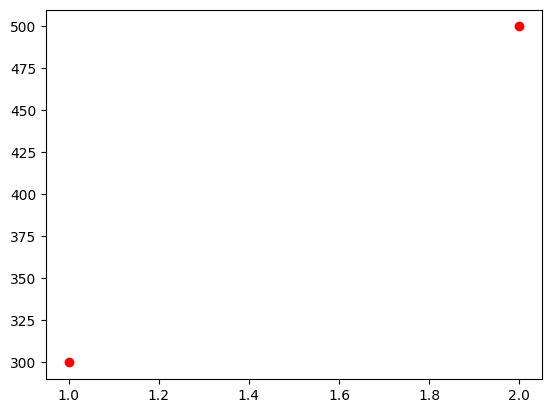

In [9]:
# initialize numpy arrays with the training set above
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300, 500])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")
plt.scatter(x_train, y_train, marker='o', color='r')

Objective is to fit a linear regression model through these two points, so that the model can predict the price of other houses - say, a house with 1200sqft. Obviously its a straight line.

>**Note**: 'f-string' is used here to be able to print expressions after evaluating. when printing. The content between the curly braces is evaluated when producing the output.

### Number of training examples `m`

we will use `m` to denote the number of training examples. Numpy array has `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array (the number of features or examples).

In [12]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples: {m}")

x_train.shape: (2,)
Number of training examples: 2


Or we can simply use `len()` method to do such thing.

In [14]:
m = len(x_train)
print(f"Number of training examples: {m}")

Number of training examples: 2


### Training example `x_i, y_i`

($x^{(i)}, y^{(i)}$) denotes the $i^{th}$ training example. In the above example we have ($x^{(0)}, y^{(0)}$) is (1.0, 300.0) and ($x^{(1)}, y^{(1)}$) is (2.0, 500.0). 

### Plotting the data using matplotlib

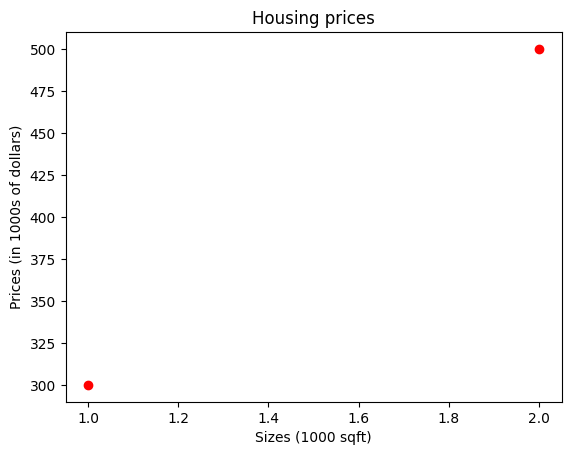

In [17]:
# plot the data points
plt.scatter(x_train, y_train, marker='o', color='r')
# set the title of the graph
plt.title("Housing prices")
# set the y-axis lable
plt.ylabel("Prices (in 1000s of dollars)")
# set the x-axis lable
plt.xlabel("Sizes (1000 sqft)")
# the show method is used to display all figures (google it)
plt.show()

Now, remember the model function of linear regression is represented as: $f_{w,b}(x^{(i)}) = w x^{(i)} + b$ 

>**Note**: This formula represents straight lines - different values of $w$ and $b$ give different straight lines on the plot

Let's get better intuition for $w$ and $b$ values to fit a line. start with $w = 100$, $b = 100$. we can comeback here to reset w and b 

In [27]:
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


Now, lets compute $f_{w,b}(x^{(i)})$ for the above two data points

> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [22]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    # Number of iterations
    m = x.shape[0]
    # Initialize targets array
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i] + b
    return f_wb
    

Now, lets call this method and plot the data

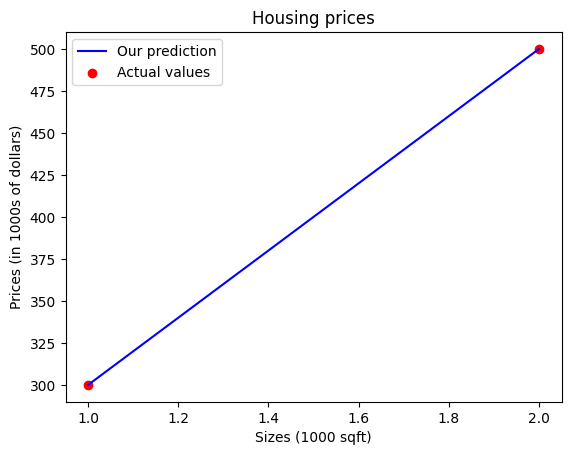

In [28]:
temp_f_wb = compute_model_output(x_train, w, b)

# plot our data prediction
plt.plot(x_train, temp_f_wb,c='b', label='Our prediction')
# plot the data points 
plt.scatter(x_train, y_train, marker='o', c ='r', label ='Actual values')
# set the title of the graph
plt.title("Housing prices")
# set the y-axis lable
plt.ylabel("Prices (in 1000s of dollars)")
# set the x-axis lable
plt.xlabel("Sizes (1000 sqft)")
# to show the rectangle explains what is red and blue in the graph 
plt.legend()
plt.show()


As we can see, setting $w = 100$ and $b = 100$ does not result a line that fits our data. 

Now, change $w$ and $b$ to make a model that fits the given data.

Question

Why $w = 200$ and $b = 100$ makes our model fits the given data?

Answer

Since, $w$ represents the slope, and we can get the slope from the given two points $rise/run$ Or $(y^{(1)} - y^{(0)}) / (x^{(1)} - x^{(0)})$, So, we have $w = (500.0 - 300.0) / (2 - 1) = 200.0/1 = 200.0$, so we have $w = 200$.

substituting in $f_{w,b}(x^{(0)}) = wx^{(0)} + b$ where $f_{w,b}(x^{(0)}) = y^{(0)}$, so we have, $300 = 200 * 1.0 + b$, b is 100.
